<a href="https://colab.research.google.com/github/lytyler/ST554_Homework4/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lanette Tyler   
ST554 Homework4

# HW3: Summarizing Data Numerically   
Copied and Pasted from HW3

## HW3 Task 1: Read in Student Data

In [ ]:
#import pandas module
import pandas as pd

In [ ]:
student_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", sep = ";")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## HW3 Task 2: Summarize the Data

### Categorical Variables

##### One-Way Contingency Table

In [ ]:
student_data.school.value_counts()

,count
school,
GP,349
MS,46


The preceeding table is a one-way contingency table of the school variable/column in the student_data dataset. The study is made up of observations of students in two different Portugese schools, represented by GP and MS. The count of 349 for the GP value indicates that 349 of the students observed were from that school. The students are disproportionately from this school, as can be seen compared to the value of 46 for MS, the other school in the study.

#### Two-Way Contingency Table

In [ ]:
pd.crosstab(student_data["romantic"], student_data["famrel"], margins = True)

famrel,1,2,3,4,5,All
romantic,,,,,,
no,3,13,47,122,78,263
yes,5,5,21,73,28,132
All,8,18,68,195,106,395


The preceding two-way contingency table breaks down the student romantic relationship status (yes or no) by the family relationsip (famrel) quality (1 to 5, very bad to excellent). The number 78 in the table corresponds to romantic = no and famrel = 5, meaning 78 students have no romantic relationship and excellent family relationships.

#### Three-Way Contingency Table

In [ ]:
pd.crosstab([student_data.sex, student_data.address], student_data.higher, margins = True,
            rownames = ["Sex", "Rural/Urban"],
            colnames = ["Higher Ed Interest"])

Higher Ed Interest  no  yes  All
Sex Rural/Urban                 
F   R                2   42   44
    U                2  162  164
M   R                4   40   44
    U               12  131  143
All                 20  375  395

In the preceding three-way continginecy table, the number 12 toward the table's bottom left indicates that 12 students in the study are males in urban areas not interested in higher education.

#### Conditional Contingency Tables (Two Ways)

Method 1 - Subset the data (for female only) and create a 2-way table (of mother's education level and student's higher education interest)



In [ ]:
pd.crosstab(student_data.loc[student_data["sex"] == "F"].Medu,
            student_data.higher,
            rownames = ["Mother's Education Level"],
            colnames = [" Female Student Higher Education Interest"])

Female Student Higher Education Interest,no,yes
Mother's Education Level,,
0,1,1
1,0,32
2,2,58
3,1,52
4,0,61


Very few female students were uninterested in higher education, seemingly regarless of the mother's education level.

Method 2 - Create a 3-way table and subset it

In [ ]:
#change sex variable to category type and rename categories as "Female" and
#"Male" for better table label
student_data["sex"] = student_data.sex.astype("category")
print(student_data.sex.cat.categories)
student_data["sex"] = student_data.sex.cat.rename_categories(["Female", "Male"])
student_data.sex.cat.categories

Index(['F', 'M'], dtype='object')


Index(['Female', 'Male'], dtype='object')

In [ ]:
#create 3-way table
my_3way_table = pd.crosstab([student_data["higher"], student_data["Medu"]],
            student_data["sex"],
            rownames =  ["Student Higher Ed Interest", "Mother Ed Level"],
            colnames = ["Sex"],
            margins = True)

#print subsetted 3-way table (female only)
my_3way_table["Female"]

Student Higher Ed Interest  Mother Ed Level
no                          0                    1
                            1                    0
                            2                    2
                            3                    1
                            4                    0
yes                         0                    1
                            1                   32
                            2                   58
                            3                   52
                            4                   61
All                                            208
Name: Female, dtype: int64

### Numeric Variables

In [ ]:
#take a look at the numeric variables
student_data[["age", "absences", "G1", "G2", "G3"]].head()

,age,absences,G1,G2,G3
0,18,6,5,6,6
1,17,4,5,5,6
2,15,10,7,8,10
3,15,2,15,14,15
4,16,4,6,10,10


#### Measures of center and spread for 3 numeric variables:

In [ ]:
s_mean = student_data[["G1", "G2", "G3"]].mean()
s_median = student_data[["G1", "G2", "G3"]].median()
s_std = student_data[["G1", "G2", "G3"]].std()
s_df = pd.DataFrame(zip(s_mean, s_median, s_std), columns = ["mean", "median", "std"],
                    index = ["G1: first period grade", "G2: second period grade", "G3: third period grade"])
s_df



,mean,median,std
G1: first period grade,10.908861,11.0,3.319195
G2: second period grade,10.713924,11.0,3.761505
G3: third period grade,10.415190,11.0,4.581443


The mean test scores came down and spread increased over time. The median stayed the same.

#### Measures of center and spread for three numeric variables with data subsetted by a grouping variable:

In [ ]:
print("Subset of students who are interested in higher ed:")
s_h_mean = student_data[student_data["higher"] == "yes"][["G1", "G2", "G3"]].mean()
s_h_median = student_data[student_data["higher"] == "yes"][["G1", "G2", "G3"]].median()
s_h_std = student_data[student_data["higher"] == "yes"][["G1", "G2", "G3"]].std()
s_h_df = pd.DataFrame(zip(s_h_mean, s_h_median, s_h_std), columns = ["mean", "median", "std"],
                    index = ["G1: first period grade", "G2: second period grade", "G3: third period grade"])
s_h_df

Subset of students who are interested in higher ed:


,mean,median,std
G1: first period grade,11.045333,11.0,3.285940
G2: second period grade,10.869333,11.0,3.722528
G3: third period grade,10.608000,11.0,4.493422


Means were a bit higher and spreads were a bit lower for stundents interested in higher education, but their scores decreased and spreads increased over time, as well. The mean stayed the same.

#### Measures of center and spread for three variables across a grouping variable:

In [ ]:
summary = student_data.groupby("romantic").agg(mean_G3 = ("G3", "mean"), median_G3 = ("G3", "median"), std_G3 = ("G3", "std"),
                                     mean_age = ("age", "mean"), median_age = ("age", "median"), std_age = ("age", "std"),
                                     mean_absences = ("absences", "mean"), median_absences = ("absences", "median"),
                                     std_absences = ("absences", "std"))
summary.index.names = ["romantic relationship"] #make a better label
summary

,mean_G3,median_G3,std_G3,mean_age,median_age,std_age,mean_absences,median_absences,std_absences
romantic relationship,,,,,,,,,
no,10.836502,11.0,4.385946,16.547529,16.0,1.246607,4.840304,3.0,5.988951
yes,9.575758,11.0,4.856916,16.992424,17.0,1.287024,7.439394,4.0,10.787509


On average, students in romantic relationships scored lower on the final test by over a point, were about half a year older, and missed around 2 1/2 days more school than those not in romantic relationships.

#### Measures of center and spread for three numeric variables across two grouping variables:


In [ ]:
#change family size variable to category type and assign clearer labels
student_data["famsize"] = student_data.famsize.astype("category")
print(student_data.famsize.cat.categories)
student_data["famsize"] = student_data.famsize.cat.rename_categories(["more than 3", "3 or less"])
student_data.famsize.cat.categories

Index(['GT3', 'LE3'], dtype='object')


Index(['more than 3', '3 or less'], dtype='object')

In [ ]:
summary2 = student_data.groupby(["sex", "famsize"])[["G1", "G2", "G3"]].agg(["mean", "median","std"])
summary2

/tmp/ipython-input-1824169876.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary2 = student_data.groupby(["sex", "famsize"])[["G1", "G2", "G3"]].agg(["mean", "median","std"])


G1                          G2                   \
                         mean median       std       mean median       std   
sex    famsize                                                               
Female more than 3  10.397436   10.0  3.200160  10.044872   10.0  3.786807   
       3 or less    11.288462   11.0  3.268006  11.423077   11.0  2.966123   
Male   more than 3  11.208000   11.0  3.389490  11.112000   11.0  3.898337   
       3 or less    11.274194   11.0  3.426844  11.000000   11.0  3.836836   

                           G3                   
                         mean median       std  
sex    famsize                                  
Female more than 3   9.628205   10.0  4.739971  
       3 or less    10.980769   11.0  4.127813  
Male   more than 3  10.864000   11.0  4.586699  
       3 or less    11.016129   11.0  4.340023

Female students with family size greater than three scored noticeably lower on all tests than the other groups.

#### Correlation matrix for all numeric values

In [ ]:
#sub_titanic_data[["age", "fare", "sibsp", "parch"]].corr()

student_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


There was strong correlation between test scores for 1st, 2nd, and 3rd periods, but not age and absences.

# HW4 Summarizing Student Data Graphically   
(Student Data Summary from HW3, continued)

In [ ]:
#import modules
import numpy as np
import pandas as pd
import matplotlib as plt

## Task 1: Graphical Summaries of Categorical and Numeric Variables

### Categorical Variables

#### Stacked Bar Graph

In [ ]:
#add variable for category type of romantic column, rename categories for better labels
student_data["romanticC"] = student_data.romantic.astype("category")
student_data["romanticC"] = student_data.romanticC.cat.rename_categories(["No Romantic Relationship", "Romantic Relationship"])

In [ ]:
#add variable for category type of famrel column
student_data["famrelC"] = student_data.famrel.astype("category")
student_data.famrelC.cat.categories

Index([1, 2, 3, 4, 5], dtype='int64')

[Text(0.5, 0, 'Quality of Family Relationships \n Very Bad (1) to Excellent (5)'),
 Text(0, 0.5, 'Number of Students')]

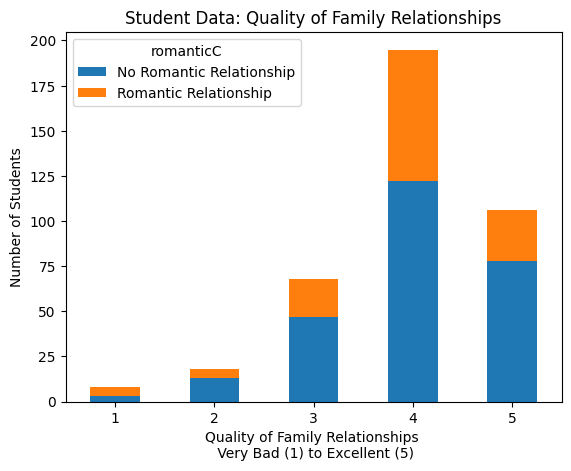

In [ ]:
table1 = pd.crosstab(student_data["famrel"], student_data["romanticC"])
table1.plot.bar(stacked = True, rot = 0,
                title =
                "Student Data: Quality of Family Relationships") \
                .set(xlabel = "Quality of Family Relationships \n Very Bad (1) to Excellent (5)",
                     ylabel = "Number of Students")

The greatest number of students have family relationship quality rating 4, just one level lower than than the highest rating of ecellent. The next most frequent rating is 5, or excellent. The least common ranking was 1, or very bad family relationship quality, followed by 2, just one level above very bad. In all family ranking groups except for "very bad," more students did not have a romantic realtionship than did.

#### Side-by-Side Bar Graph

In [ ]:
#add category variable types for address and higher columns
student_data["addressC"] = student_data.address.astype("category")
student_data["addressC"] = student_data.addressC.cat.rename_categories(["Rural", "Urban"])
student_data["higherC"] = student_data.higher.astype("category")
student_data["higherC"] = student_data.higherC.cat.rename_categories(["No Higher Ed Interest", "Higher Ed Interest"])

[Text(0.5, 0, 'Higher Education Interest Status'),
 Text(0, 0.5, 'Number of Students')]

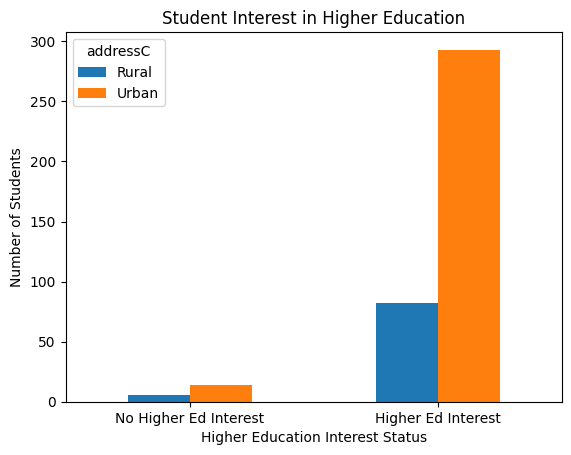

In [ ]:
table2 = pd.crosstab(student_data.higherC, student_data.addressC)
table2.plot.bar(rot = 0, title = "Student Interest in Higher Education") \
    .set(xlabel = "Higher Education Interest Status",
         ylabel = "Number of Students")

Many more students are interested in higher educaiton than are not (in both rural and urban areas), and many more students live in urban areas than in rural areas. The proportion of students not interested in higher education is higher in rural areas.

### Numeric Variables (and across groups)

#### G3: Final Math Score Across RUral and Urban Home Locations

In [ ]:
#prepare for overlaid histograms
#create separate series for categories of categorical variable
#determine bins to set
G3_rural = student_data.loc[student_data.addressC == "Rural", "G3"]
G3_urban = student_data.loc[student_data.addressC == "Urban", "G3"]
no_bins = 10
bins = [i*max(student_data.G3)/no_bins for i in range(0, no_bins + 1)]

[Text(0.5, 0, 'G3: Final Math Scores')]

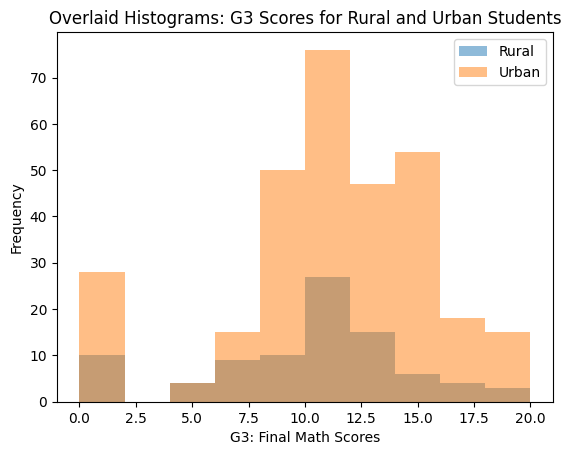

In [ ]:
#Create overlaid histograms of G3 for rural and urban students
G3_rural.plot(kind = "hist", alpha = 0.5, bins = bins, label = "Rural",
                   title = "Overlaid Histograms: G3 Scores for Rural and Urban Students",
              legend = True)
G3_urban.plot(kind = "hist", alpha = 0.5, bins = bins, label = "Urban",
              legend = True) \
    .set(xlabel = "G3: Final Math Scores")

The range of values and centers of final math scores seem very similar in the overlaid histogram, with perhaps a but higher center for urban students. There are more urban than rural students.

[Text(0.5, 0, 'G3: Final Math Scores')]

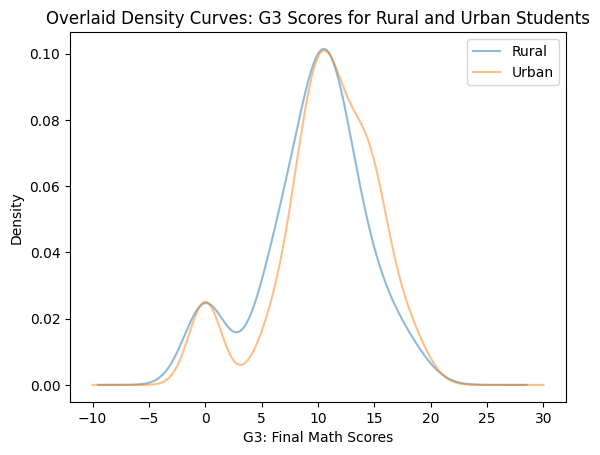

In [ ]:
#Create overlaid density curves for urban vs. rural G3 scores
G3_rural.plot(kind = "density", alpha = 0.5, label = "Rural",
                   title = "Overlaid Density Curves: G3 Scores for Rural and Urban Students",
              legend = True)
G3_urban.plot(kind = "density", alpha = 0.5, label = "Urban",
              legend = True) \
    .set(xlabel = "G3: Final Math Scores")

The overlaid density curve shows great overlap between the urban and rural scores.

[Text(0.5, 0, 'Home Location Type'), Text(0, 0.5, 'Student G3 Score')]

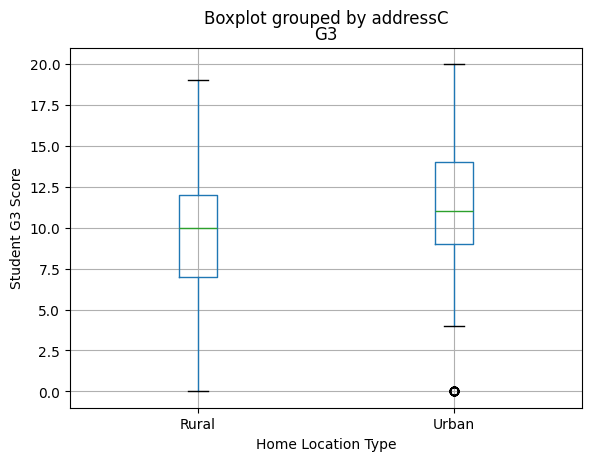

In [ ]:
#Create grouped boxplots of G3 scores for urban vs. rural students
student_data.boxplot(column = "G3", by = "addressC") \
    .set(xlabel = "Home Location Type",
         ylabel = "Student G3 Score")

The grouped boxplot shows overlapping ranges, like the histograms and density curves above, but make the higher center of the urabn scores more clear.

#### Age Across Interest in Higher Education

##### Side-by-Side Histograms of Age

/tmp/ipython-input-4175888327.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.hist(column = "age", by = "higherC")


array([<Axes: title={'center': 'No Higher Ed Interest'}>,
       <Axes: title={'center': 'Higher Ed Interest'}>], dtype=object)

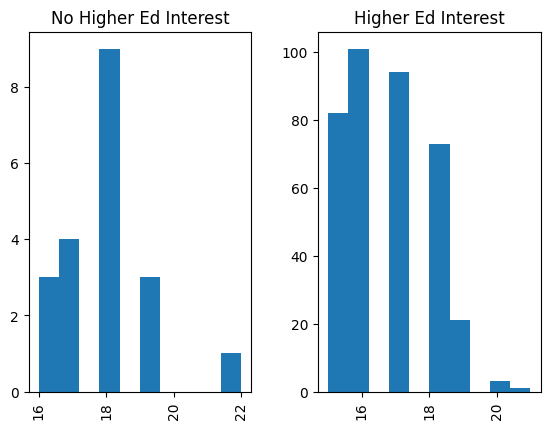

In [ ]:
student_data.hist(column = "age", by = "higherC")

There are many more students interested in higher education than not interested. The most common age for those not inrested is 18, while those not interested peak from 16 to 17.

[Text(0.5, 0, 'Age')]

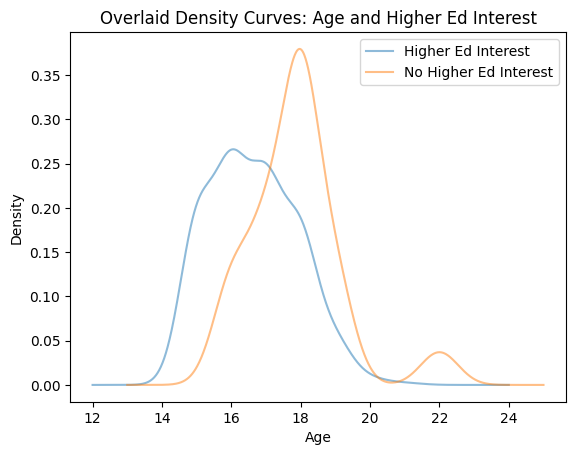

In [ ]:
#Create overlaid density curves for age of students with and without interest in higher ed
#start with two age series, one for interested in higher ed and one for not
age_more_ed = student_data.loc[student_data["higherC"] == "Higher Ed Interest", "age"]
age_no_more_ed = student_data.loc[student_data["higherC"] == "No Higher Ed Interest", "age"]
age_more_ed.plot(kind = "density", alpha = 0.5, label = "Higher Ed Interest",
                   title = "Overlaid Density Curves: Age and Higher Ed Interest",
                   bw_method = 0.4, legend = True)
age_no_more_ed.plot(kind = "density", alpha = 0.5, label = "No Higher Ed Interest",
              legend = True, bw_method = 0.4) \
    .set(xlabel = "Age")

Age of students interested in higher educaiton is centerd around 16, while the age of students not interested in higher ed is centered around 18.

[Text(0.5, 0, 'Student Interest in Higher Education'),
 Text(0, 0.5, 'Student Age')]

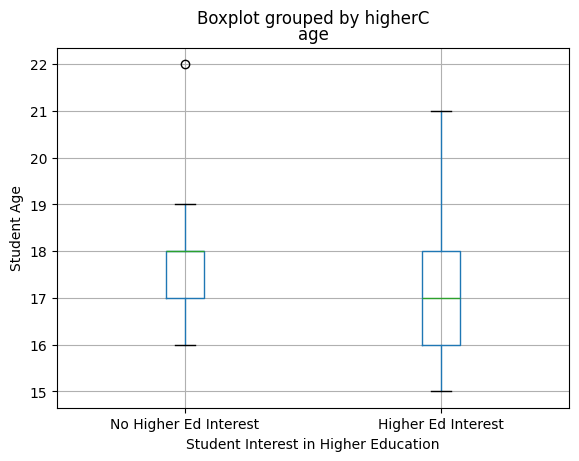

In [ ]:
student_data.boxplot(column = "age", by = "higherC") \
    .set(xlabel = "Student Interest in Higher Education",
         ylabel = "Student Age")

The median age of students not interested in higher education is 18, while the median age for students not interetsed in higher education is 16. The age range is wider for those interested.

#### Scatter Plots

[Text(0, 0.5, 'Student Age')]

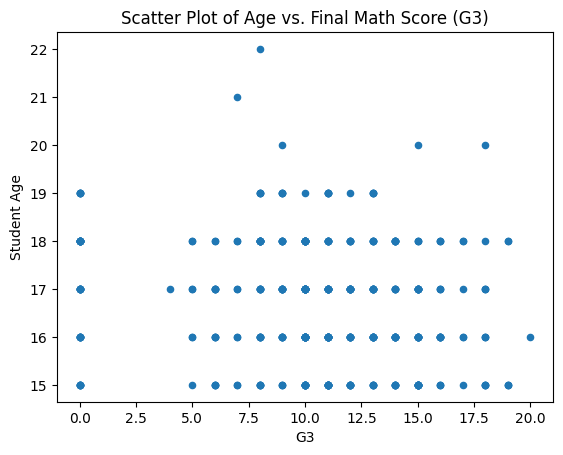

In [ ]:
student_data.plot.scatter(x = "G3", y = "age",
                          title = "Scatter Plot of Age vs. Final Math Score (G3)") \
                          .set(ylabel = "Student Age")

There is not a clear relationship between final math score (G3) and student age visible in this scatter plot.

<Axes: title={'center': 'Scatter Plot of G1 and G3 Math Scores'}, xlabel='G1', ylabel='G3'>

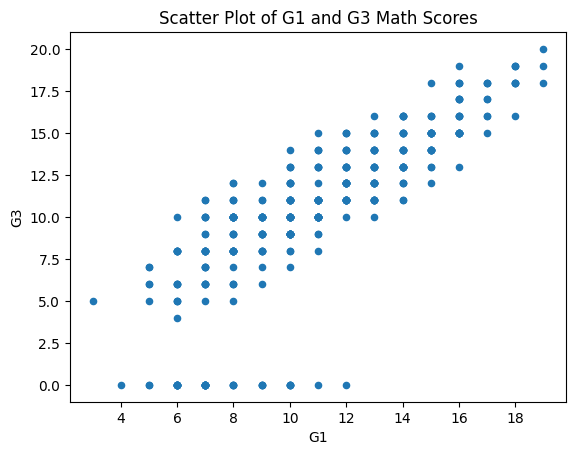

In [ ]:
student_data.plot.scatter(x = "G1", y = "G3", title = "Scatter Plot of G1 and G3 Math Scores")

The scatter plot shows a strong, positive, linearm relationship betweent he students' first period grade and final grade in math.

# HW4: Plotting NFL Data

## Task 1: Read in the Data

In [164]:
#Read in data
NFL_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
NFL_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [167]:
#update data formats to category type for
#homeTeam, awayTeam, day, stadium, startTime, toss, roof, and surface
NFL_data["day"] = NFL_data.day.astype("category")
NFL_data["homeTeam"] = NFL_data.homeTeam.astype("category")
NFL_data["awayTeam"] = NFL_data.awayTeam.astype("category")
NFL_data["stadium"] = NFL_data.stadium.astype("category")
NFL_data["startTime"] = NFL_data.startTime.astype("category")
NFL_data["toss"] = NFL_data.toss.astype("category")
NFL_data["roof"] = NFL_data.roof.astype("category")
NFL_data["surface"] = NFL_data.surface.astype("category")

## Task 2: Summarize the Data   
For the regular seaon, grouped by season and week, season alone, and week alone


In [179]:
#filter for regular season, weeks 1 to 17
#check out values in wwek column
NFL_data.week.value_counts()

,count
week,
1,208
14,208
15,208
16,208
13,208
17,208
2,207
12,205
11,201


In [196]:
#Filter data for the regular season (weeks 1 to 17)
regS_data = NFL_data.loc[(NFL_data["week"] != "WildCard") &
             (NFL_data["week"] != "Division") &
             (NFL_data["week"] != "ConfChamp") &
             (NFL_data["week"] != "SuperBowl")]
regS_data.week.value_counts() #make sure only weeks 1 to 17

,count
week,
1,208
14,208
15,208
16,208
17,208
13,208
2,207
12,205
11,201


### Numeric Summaries (Regular Season)

#### Grouped by Season and Week

In [205]:
summary1 = regS_data.groupby(["season", "week"])[["AfirstDowns", "HfirstDowns", "AFinal", "HFinal"]].agg(["mean","std"])
summary1

AfirstDowns           HfirstDowns               AFinal             \
                   mean       std        mean       std       mean        std   
season week                                                                     
2002   1      17.687500  4.316152   20.875000  4.856267  23.125000   9.680737   
       10     18.642857  4.533756   20.928571  4.480115  23.500000  10.478917   
       11     17.000000  4.647580   20.000000  4.115013  18.375000   7.864477   
       12     20.937500  5.397144   18.937500  5.662376  21.187500  11.513579   
       13     17.750000  5.802298   19.625000  5.463515  19.062500   9.650345   
...                 ...       ...         ...       ...        ...        ...   
2014   5      18.200000  5.267149   21.533333  6.116333  19.133333   8.078779   
       6      22.400000  4.404543   18.000000  4.855042  26.200000  12.131423   
       7      20.066667  5.560918   19.466667  3.758166  18.133333   8.061076   
       8      20.666667  4.577377   21.533333  6.289068  22.600000   8.781474   
       9      20.846154  5.413658   21.461538  4.235079  21.846154  10.139413   

                HFinal             
                  mean        std  
season week                        
2002   1     26.125000  11.050641  
       10    22.571429  10.580928  
       11    22.562500   7.023473  
       12    21.000000   8.809086  
       13    25.000000  10.507140  
...                ...        ...  
2014   5     27.933333  10.592900  
       6     22.200000   8.554030  
       7     25.533333   8.192912  
       8     26.733333  13.540767  
       9     26.384615  10.851563  

[221 rows x 8 columns]

#### Grouped by Season

In [206]:
summary2 = regS_data.groupby("season")[["AfirstDowns", "HfirstDowns", "AFinal", "HFinal"]].agg(["mean","std"])
summary2

AfirstDowns           HfirstDowns               AFinal             \
              mean       std        mean       std       mean        std   
season                                                                     
2002     18.492188  5.085151   19.503906  4.760127  20.550781  10.064759   
2003     17.492188  5.105162   19.097656  4.639371  19.054688  10.251970   
2004     18.355469  5.047481   19.195312  4.981627  20.230469  10.175596   
2005     17.925781  5.150134   18.894531  4.760191  18.792969   9.948894   
2006     17.972656  4.685735   18.761719  4.927102  20.234375  10.386254   
2007     18.292969  5.169681   18.925781  4.791983  20.253906  10.703215   
2008     18.015625  5.058070   18.753906  4.651585  20.750000  10.420944   
2009     17.855469  4.799368   19.519531  5.279595  20.363281  10.672526   
2010     18.660156  5.238408   19.183594  4.723064  21.089844  10.288187   
2011     19.152344  4.982738   19.789062  4.924771  20.546875   9.634789   
2012     19.492188  5.105931   20.203125  5.184985  21.539062  10.404676   
2013     19.304688  4.940522   20.585938  5.117486  21.855469   9.664500   
2014     19.839844  4.935042   20.222656  5.207953  21.343750   9.877634   

           HFinal             
             mean        std  
season                        
2002    22.796875  10.182152  
2003    22.609375  10.119470  
2004    22.738281  10.400502  
2005    22.441406   9.797383  
2006    21.082031   9.856475  
2007    23.121094  10.568033  
2008    23.308594  10.454499  
2009    22.570312  10.666557  
2010    22.984375  10.251339  
2011    23.812500  10.524109  
2012    23.972656  10.559413  
2013    24.960938  10.533534  
2014    23.832031  10.954053

#### Grouped by Week

In [210]:
regS_data["week"] = regS_data.week.astype("int")
summary3 = regS_data.groupby("week")[["AfirstDowns", "HfirstDowns", "AFinal", "HFinal"]].agg(["mean","std"])
summary3

/tmp/ipython-input-2171000420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regS_data["week"] = regS_data.week.astype("int")


AfirstDowns           HfirstDowns               AFinal             \
            mean       std        mean       std       mean        std   
week                                                                     
1      18.302885  4.530049   18.879808  4.788268  19.716346   8.977768   
2      17.850242  5.083935   20.072464  5.075122  19.545894  10.433170   
3      18.858586  4.905213   20.106061  4.734994  20.767677   9.634781   
4      18.842391  5.305132   19.815217  4.924411  20.983696  10.062361   
5      18.708791  5.105282   19.434066  5.084213  20.527473  10.300824   
6      19.049724  4.899293   19.187845  4.924775  20.679558  10.270079   
7      18.738889  5.008779   19.411111  5.013712  21.111111  10.674927   
8      18.146067  4.858566   19.977528  5.122185  20.151685   9.782639   
9      19.370787  4.827843   19.674157  5.195120  22.146067   9.701244   
10     18.462366  5.073640   19.182796  4.932948  21.543011  10.015705   
11     18.278607  5.337789   19.238806  4.801321  19.592040  10.017122   
12     19.112195  5.276855   19.307317  4.916778  21.507317  10.795160   
13     18.716346  4.922719   19.370192  5.077418  20.437500  10.131786   
14     17.870192  5.414908   19.461538  4.929303  19.394231  10.203171   
15     18.629808  5.117223   18.995192  4.896511  20.942308  11.224393   
16     18.206731  5.043823   19.341346  5.269896  20.802885  10.330041   
17     18.043269  5.149274   19.038462  4.427457  19.235577  10.637064   

         HFinal             
           mean        std  
week                        
1     22.139423  10.595541  
2     22.840580   9.842384  
3     22.646465  10.153955  
4     24.092391  10.874704  
5     24.324176  10.158379  
6     22.988950   9.254422  
7     23.338889  10.948924  
8     23.359551  10.573121  
9     22.258427   9.152849  
10    22.983871  10.753491  
11    22.582090  10.326397  
12    22.878049  10.035220  
13    23.201923  10.579700  
14    24.605769  11.453682  
15    22.543269  10.288498  
16    22.168269  11.019331  
17    23.807692  10.339247

### Graphical Summaries (Regular Season)

[Text(0, 0.5, 'Average Season Score')]

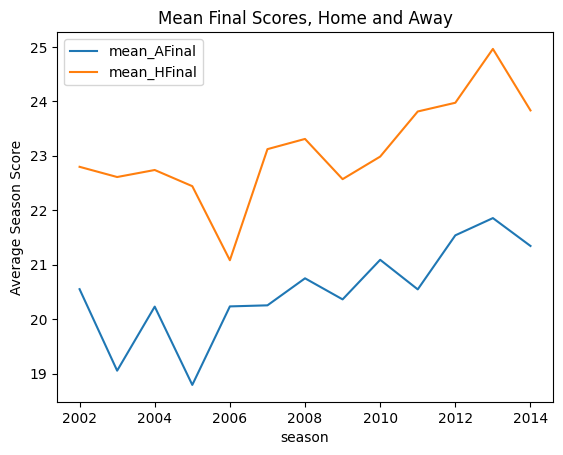

In [216]:
#create data summary to plot then plot
plot1_data = regS_data.groupby("season").agg(mean_AFinal = ("AFinal", "mean"),
                                            mean_HFinal = ("HFinal", "mean"))
plot1_data.plot.line(title = "Mean Final Scores, Home and Away") \
    .set(ylabel = "Average Season Score")

The home teams had the advantage in mean points scored, and the trend over time was increasing average scores.

[Text(0, 0.5, 'Mean Number of First Downs')]

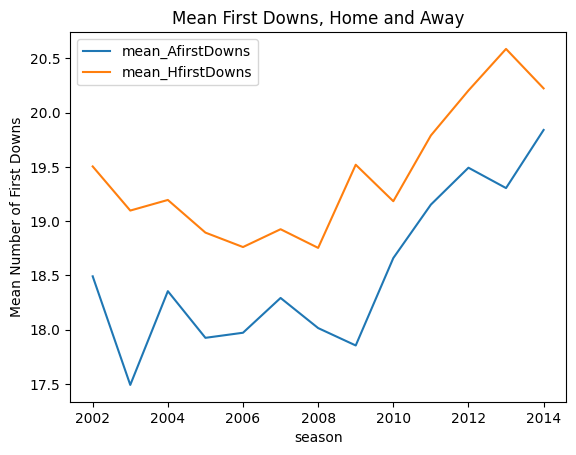

In [218]:
#create data summary to plot then plot
plot2_data = regS_data.groupby("season").agg(mean_AfirstDowns = ("AfirstDowns", "mean"),
                                            mean_HfirstDowns = ("HfirstDowns", "mean"))
plot2_data.plot.line(title = "Mean First Downs, Home and Away") \
    .set(ylabel = "Mean Number of First Downs")

The home teams had the advantage on average, and the number of first downs trended upward over time.

[Text(0, 0.5, 'Average Total Yards')]

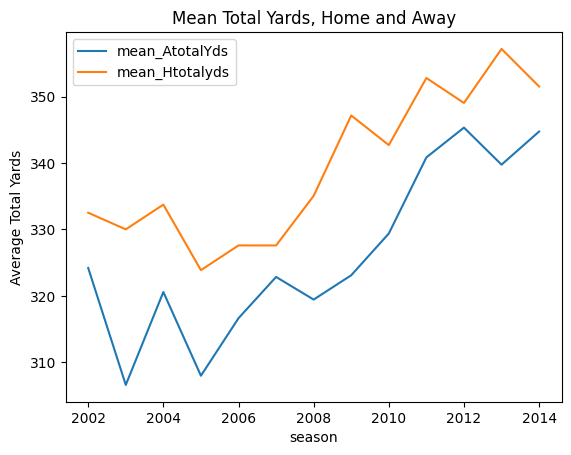

In [222]:
#create data summary to plot then plot
plot3_data = regS_data.groupby("season").agg(mean_AtotalYds = ("AtotalYds", "mean"),
                                            mean_Htotalyds = ("HtotalYds", "mean"))
plot3_data.plot.line(title = "Mean Total Yards, Home and Away") \
    .set(ylabel = "Average Total Yards")

### Write a Function to Easily Create a Plot for this Data

In [347]:
#timeit() function from class notes
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"{func.__name__} ran in {elapsed:.6f} seconds")
        return result
    return wrapper

In [348]:
#my function to plot NFL data
def team_score_plot(team: str, stat: str):
    """
    This is a function that takes in an NFL team name () and a statistic (min, mean,
    median, max, std) and plots that statistic for the team's home and away games
    per season. Team name should be entered as location and mascot with capital
    letters.
    """
    #if stat == "mean":
    home_data = regS_data.loc[(regS_data["homeTeam"] == team),
                           ["season", "HFinal"]] \
               .groupby("season") \
               .agg(stat)
    away_data = regS_data.loc[regS_data["awayTeam"] == team,
                          ["season", "AFinal"]] \
                .groupby("season") \
                .agg(stat)
    plotting_data = pd.concat([home_data, away_data], axis = 1)
    plotting_data.plot.line(title = team + ": Home and Away Scoring") \
            .set(ylabel = stat[0].upper() + stat[1:] +" Points")

In [349]:
#add timeit() decorator to my function (team_score_plot)
@timeit
def team_score_plot(team: str, stat: str):
    """
    This is a function that takes in an NFL team name () and a statistic (min, mean,
    median, max, std) and plots that statistic for the team's home and away games
    per season. Team name should be entered as location and mascot with capital
    letters.
    """
    #if stat == "mean":
    home_data = regS_data.loc[(regS_data["homeTeam"] == team),
                           ["season", "HFinal"]] \
               .groupby("season") \
               .agg(stat)
    away_data = regS_data.loc[regS_data["awayTeam"] == team,
                          ["season", "AFinal"]] \
                .groupby("season") \
                .agg(stat)
    plotting_data = pd.concat([home_data, away_data], axis = 1)
    plotting_data.plot.line(title = team + ": Home and Away Scoring") \
            .set(ylabel = stat[0].upper() + stat[1:] +" Points")

Try out my function:

team_score_plot ran in 0.067770 seconds


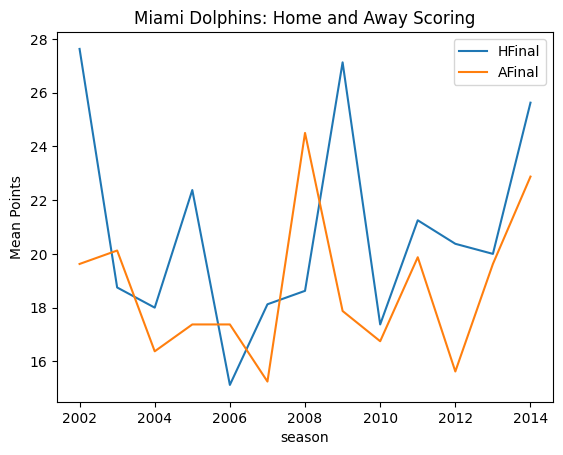

In [350]:
team_score_plot("Miami Dolphins", "mean")

team_score_plot ran in 0.038175 seconds


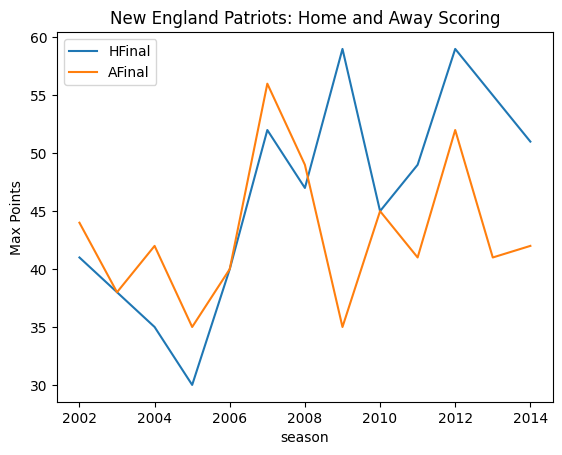

In [356]:
team_score_plot("New England Patriots", "max")

team_score_plot ran in 0.039687 seconds


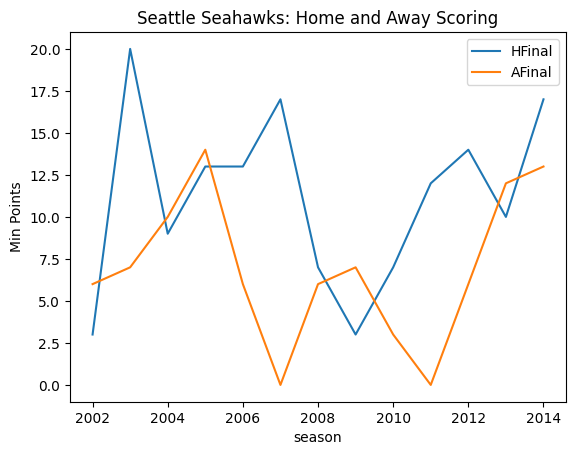

In [357]:
team_score_plot("Seattle Seahawks", "min")

team_score_plot ran in 0.051427 seconds


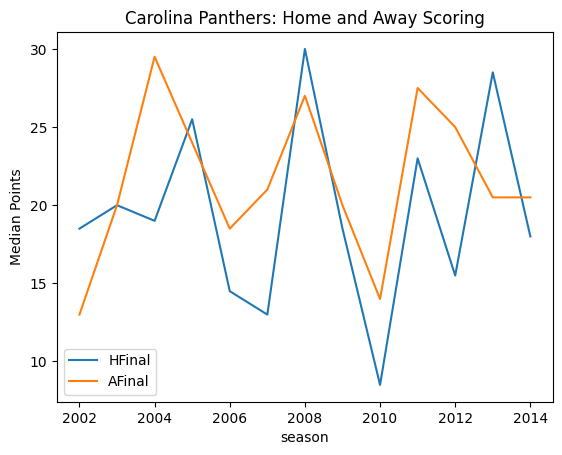

In [358]:
team_score_plot("Carolina Panthers", "median")